In [4]:
import numpy as np

In [5]:
a=np.array([[1,2,3],[2,2,3]])
np.sum(a,axis=1)

array([6, 7])

In [6]:
a.shape

(2, 3)

In [7]:
 np.sum(a,axis=1,keepdims=True)   #it does not reduces the bracket

array([[6],
       [7]])

In [8]:
# lets define softmax
def softmax(a):
    e_pa=np.exp(a)
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [9]:
a=np.array([[10,10],
            [10,20]])
print(softmax(a))

[[5.00000000e-01 5.00000000e-01]
 [4.53978687e-05 9.99954602e-01]]


In [10]:
input_size=3  #total no of neuron(ne) in input  here it is 3
layers=[4,3]   #no of entries in list will be equal to the no of hidden layers in network successively
               #and value at each index equal to the no of ne in the that particular hidden layer
               #for eg this network will have 2 hidden layers 
               #first hidden layer will have 4 ne and that 2nd will be 3
out_size=2   #this will define no possible ouput in the output layer in our case it is 2

# over all we have network of 4 layer 2 in/out and 2 are hidden layer

In [11]:
# creating class of NN
class neNet:
    #each object of this class will have some featuers such as
    #1.input size    2.layers     3.output size     lets make it attribute for all object of this class
    def __init__(self,input_size,layers,out_size):
        np.random.seed(0)  #to get the same initialization of weights each time
        model={} 
        
        #craeting the first layer weight matrix
        #1st hidden layer   W and b
        model['w1']=np.random.randn(input_size,layers[0])
        #creating the bias for this hidden layer which will be equal to the no of ne in the 1st hidden lay.
        model['b1']=np.zeros((1,layers[0]))
        #doing the same for all the hidden we have and output layer
        
        #2nd hidden layer w and b
        model['w2']=np.random.randn(layers[0],layers[1])
        model['b2']=np.zeros((1,layers[1]))
        
        #third layer or output layer
        model['w3']=np.random.randn(layers[1],out_size)
        model['b3']=np.zeros((1,out_size))
        
        #lets add it as a attribute so that each object can have it and easily accesible
        self.model=model
        self.actvation=None
        
        
    def forward(self,x):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        #print(x.shape,w1.shape,b1.shape)
        z1=np.dot(x,w1)+b1
        a1=np.tanh(z1)             #output of first hidden layer
        
        #print(a1.shape,w2.shape,b2.shape)
        z2=np.dot(a1,w2)+b2
        a2=np.tanh(z2)               #output of second hidden layer
        
        z3=np.dot(a2,w3)+b3   
        y_=softmax(z3)                #output of last(output) layer
        
        self.actvation=(a1,a2,y_)
        return y_                           #shape  (m=total no examples, k=no of classes)
    
    def backward(self,x,y,lr=0.001):
        #getting the initialised w and b
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3=self.model['b1'],self.model['b1'],self.model['b1']
        
        m=x.shape[0]
        
        a1,a2,y_=self.actvation
        
        #computing the gradient of w and b in each layer of each neouron
        #for that we need delta_w loss and delta_b loss 
        #delta w and b will differ for output layer and hidden layer
        
        #for output layer
        #size of input matrix for the input layer will be equal to the shape of the x (m,np of features)
        
        #size of input matrix for the first hidden layer will be equal to the shape of the x (m,np of features)  
        
        #size of input matrix for the second hidden layer will be equal to the shape of the matrix
        #produced by the first hidden layer ie (m,no of neurons in the first hidden layer)
        #each row dedicated to each example and each column of which will contain the activation of each 
        #neuron for a particular example each neouron will show atleast some activr ation
        #for better understanding use the anlogy of output layer where each output neuron will have some
        #prediction  for each class or each neoron is perceptron hence it will have some prediction
        
        #size of input matrix for the output layer will be equal to the shape of the matrix
        #produced by the second hidden layer ie (m,no of neurons in the second hidden layer)
        #each row dedicated to each example and each column of which will contain the activation of each 
        #neuron.
        
        #we have talked about weight matrices shape so much   
        
        #working on the output layer
        delta3= y_ -y
        dw3=np.dot(a2.T,delta3)          #gradient of weight in output layer
        db3=np.sum(delta3,axis=0)/m       #gradient of bias in output layer
        
        #working on the 2nd last hidden layer
        delta2=(1-np.square(a2))* np.dot(delta3,w3.T)
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)/m
        
        #working on the 3rd last hidden layer  (1st in our case)
        delta1=(1-np.square(a1))* np.dot(delta2,w2.T)
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)/m
        
        #upadting the wights and biases
        self.model['w1'] -= lr*dw1
        self.model['b1'] -= lr*db1
        
        self.model['w2'] -= lr*dw2
        self.model['b2'] -= lr*db2
        
        self.model['w3'] -= lr*dw3
        self.model['b3'] -= lr*db3
        
    def predict(self,x):
        y_out=self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        a1,a2,y_= self.actvation
        
        #summary
        print('w1',w1.shape)
        print('a1',a1.shape)
        
        print('w2',w2.shape)
        print('a2',a2.shape)
        
        print('w3',w3.shape)
        print('y_',y_.shape)
        

In [12]:
def loss(y_ohot,p):              #always try to make an analogy with Linear regression
    l=-np.mean(y_ohot*np.log(p))
    return l

def one_hot(y,depth):         #depth is the no classes
    m=y.shape[0]
    y_ohot=np.zeros((m,depth))
    y_ohot[np.arange(m),y]=1
    return y_ohot
    

In [18]:
y.shape
y

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,

In [19]:
y_ohot=one_hot(y,2)
y_ohot

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [15]:
# generating the datasets
from sklearn.datasets import make_circles,make_moons,make_classification
import matplotlib.pyplot as plt

In [16]:
x,y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

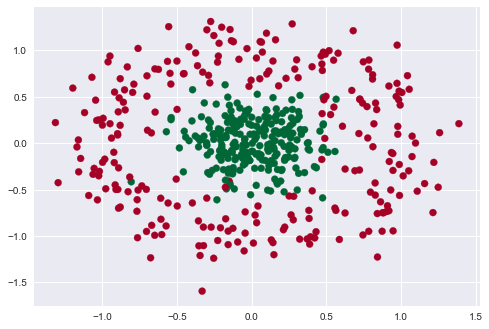

In [17]:
plt.style.use('seaborn')
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlGn)
plt.show()

# 12.Training

In [20]:
# craeting an object
model=neNet(input_size=2,layers=[10,5],out_size=2)  #here we give the input to each attribute of the class

In [21]:
model.forward(x[0])   #output for the 1 eg and out network is totally untrained

array([[0.52335135, 0.47664865]])

In [22]:
model.summary()   #these are respective w and activations shapes

w1 (2, 10)
a1 (1, 10)
w2 (10, 5)
a2 (1, 5)
w3 (5, 2)
y_ (1, 2)


In [23]:
model.forward(x)   #output for the 1 eg and out network is totally untrained

array([[0.52335135, 0.47664865],
       [0.53144257, 0.46855743],
       [0.57726974, 0.42273026],
       [0.28383524, 0.71616476],
       [0.63877346, 0.36122654],
       [0.50841174, 0.49158826],
       [0.37442957, 0.62557043],
       [0.55888858, 0.44111142],
       [0.5711453 , 0.4288547 ],
       [0.3442594 , 0.6557406 ],
       [0.49498476, 0.50501524],
       [0.4336066 , 0.5663934 ],
       [0.36449759, 0.63550241],
       [0.37609645, 0.62390355],
       [0.51318589, 0.48681411],
       [0.40138333, 0.59861667],
       [0.4729603 , 0.5270397 ],
       [0.6071061 , 0.3928939 ],
       [0.45184873, 0.54815127],
       [0.43976498, 0.56023502],
       [0.48953223, 0.51046777],
       [0.55503744, 0.44496256],
       [0.58933294, 0.41066706],
       [0.64427947, 0.35572053],
       [0.45240396, 0.54759604],
       [0.56502192, 0.43497808],
       [0.5600346 , 0.4399654 ],
       [0.47502227, 0.52497773],
       [0.41733084, 0.58266916],
       [0.70560946, 0.29439054],
       [0.

In [24]:
# training
def train(x,y,model,epochs,learning_rate,logs=True):
    loss_list=[]
    classs=2
    y_ohot=one_hot(y,classs)
    
    for i in range(epochs):
        y_=model.forward(x)
        l=loss(y_ohot,y_)
        loss_list.append(l)
        model.backward(x,y_ohot,learning_rate)   #always need one hot vector nevwr simple label
        if(logs):
            print(i,l)
            
    return loss_list

In [25]:
loss_list=train(x,y,model,700,0.001) 
#each time you run this first make a new object of nnet otherwise there will be some somevalues in w and b
#which may create error

0 0.3570778358444834
1 0.3486017064169557
2 0.347530035159378
3 0.34663195796568513
4 0.34578670923875515
5 0.3449847912669102
6 0.3442195769652407
7 0.34348542105596425
8 0.3427774868568946
9 0.34209162596270165
10 0.34142427542599846
11 0.3407723696841233
12 0.3401332654502669
13 0.33950467792469474
14 0.33888462680368026
15 0.33827139070367823
16 0.3376634687685207
17 0.33705954837801666
18 0.33645847801989714
19 0.3358592445191297
20 0.33526095393702887
21 0.3346628155567519
22 0.3340641284620865
23 0.3334642702939149
24 0.3328626878346478
25 0.3322588891266322
26 0.33165243687740653
27 0.33104294294394193
28 0.3304300637208346
29 0.3298134962847812
30 0.3291929751704613
31 0.328568269671923
32 0.32793918157935076
33 0.32730554327424016
34 0.3266672161169664
35 0.32602408906990865
36 0.32537607750699693
37 0.3247231221670656
38 0.32406518821395675
39 0.32340226437111197
40 0.3227343621025904
41 0.3220615148161772
42 0.32138377706764093
43 0.3207012237483112
44 0.3200139492411007
45

420 0.19111145156880005
421 0.19755812242854978
422 0.1905174853977669
423 0.1971686583873367
424 0.18992083687432296
425 0.1967647871866156
426 0.1893211353942387
427 0.19634423350610503
428 0.18871752075293396
429 0.19590465080033703
430 0.18810865154099526
431 0.19544375230629335
432 0.18749279180426465
433 0.19495949247022284
434 0.18686796559564886
435 0.19445027406616264
436 0.1862321492673982
437 0.19391514142011146
438 0.18558345956977565
439 0.1933539163877843
440 0.18492029789870926
441 0.1927672448429263
442 0.1842414270990849
443 0.19215654415376038
444 0.18354597996429534
445 0.19152386724153103
446 0.18283341800155772
447 0.19087171628172345
448 0.18210346803147284
449 0.19020284357190256
450 0.1813560617699469
451 0.1895200699188632
452 0.18059129388591827
453 0.1888261379296382
454 0.1798094029264438
455 0.18812360504419812
456 0.1790107711374698
457 0.18741477270463297
458 0.17819593503778924
459 0.18670164433537834
460 0.17736559801965468
461 0.1859859045120785
462 0.

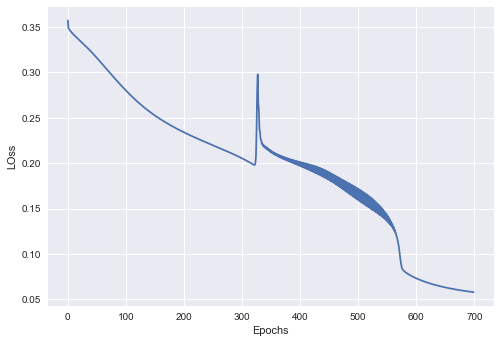

In [26]:
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('LOss')
plt.show()

# 13.Accuracy

In [143]:
import sys
sys.path

['D:\\Jupyter Sketch\\999.DS\\27.MLP',
 'C:\\ProgramData\\Anaconda3\\python37.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\Users\\Acer\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Acer\\.ipython']

In [380]:
from visualise import plot_decision_boundary

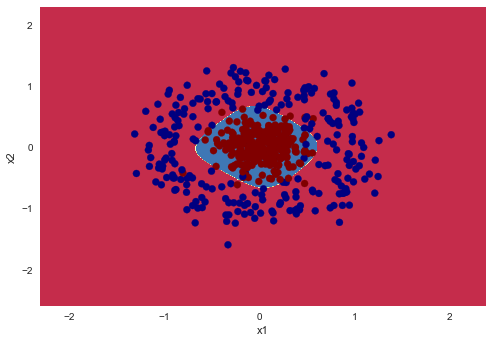

In [414]:
plot_decision_boundary(lambda k:model.predict(k),x,y)

In [341]:
l=lambda k:model.predict(k)

In [342]:
l(x)

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [186]:
x

array([[ 2.53579721e-01,  8.54164333e-01],
       [-3.63646142e-01,  5.49329443e-01],
       [ 4.17987423e-01,  9.32022861e-01],
       [-2.10018519e-01,  8.91296460e-01],
       [ 7.54496237e-01, -5.03462886e-01],
       [ 7.50051885e-01, -1.57244766e-01],
       [ 5.89547986e-03,  8.09669583e-01],
       [ 7.55163027e-01,  6.97625457e-01],
       [ 1.07051089e+00, -2.09221975e-01],
       [-5.96886917e-01,  7.62802785e-01],
       [-9.27403623e-02,  8.26989546e-01],
       [-3.81299230e-01, -8.91951518e-01],
       [-7.68827492e-01,  2.46753060e-01],
       [-1.09803731e-01,  1.04544743e+00],
       [ 2.25717077e-01,  8.41996250e-01],
       [-1.28797408e-01, -1.26642079e+00],
       [-5.27406984e-02, -6.89060918e-01],
       [ 4.36390332e-01,  5.06343417e-01],
       [-9.91886615e-01, -4.81130247e-01],
       [-8.06444134e-01, -4.83593192e-01],
       [ 4.02263586e-01,  6.85567435e-01],
       [ 1.67941363e-01,  7.75941062e-01],
       [ 2.04914717e-02,  6.26189787e-01],
       [ 7.

In [343]:
model.predict(x[1])

array([1], dtype=int64)

# Getting the prediction

In [418]:
output= model.predict(x)

In [419]:
output

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,

In [420]:
# now i will compare with original result ie y
output==y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

### for accuracy

In [421]:
np.sum(output==y)

486

In [424]:
training_accuacy=np.sum(output==y)/y.shape[0]
training_accuacy*100

97.2

# 14.XOR dataset

In [426]:
# creating the data set
x2=np.array([[0,0],[0,1],[1,0],[1,1]])
y2=np.array([0,1,1,0])

In [427]:
# creating the model
model2=neNet(input_size=2,layers=[10,5],out_size=2)

In [432]:
losses=train(x2,y2,model2,200,0.1)

0 0.025171030457855615
1 0.024142531680625676
2 0.023190283667207233
3 0.02230644007290493
4 0.021484159512645526
5 0.020717454686134583
6 0.020001067037833612
7 0.01933036221664797
8 0.018701242540136935
9 0.018110073412564615
10 0.017553621236751298
11 0.017029000829247062
12 0.016533630722615312
13 0.016065195037792555
14 0.015621610849399557
15 0.015201000159894895
16 0.014801665754281507
17 0.014422070333297681
18 0.014060818425631397
19 0.013716640663390324
20 0.013388380073567307
21 0.013074980094504404
22 0.012775474072726462
23 0.012488976033846553
24 0.012214672553046589
25 0.011951815577090692
26 0.011699716071915969
27 0.011457738388331765
28 0.011225295253884807
29 0.011001843312019277
30 0.010786879140701588
31 0.010579935692028069
32 0.010380579102270526
33 0.010188405828570942
34 0.010003040074263638
35 0.009824131469734251
36 0.009651352979958328
37 0.009484399013493988
38 0.009322983710841016
39 0.009166839392779392
40 0.009015715151643396
41 0.008869375570516383
42 0

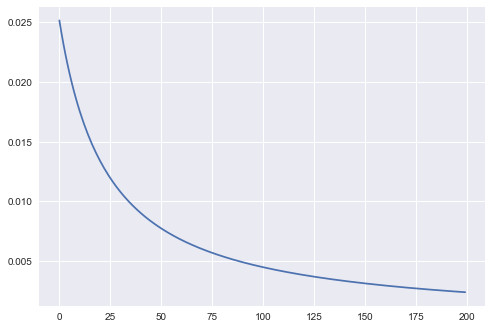

In [433]:
plt.plot(losses)

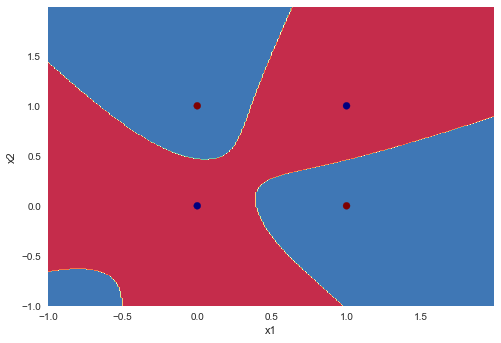

In [434]:
plot_decision_boundary(lambda k:model2.predict(k),x2,y2)  #100 % accu racy

# 15.comparing performance

In [452]:
def load_datasets(dataset):
    if(dataset=='moons'):
        x,y=make_moons(n_samples=500,noise=.2,random_state=1)
    elif(dataset=='circles'):
        x,y=make_circles(n_samples=500,shuffle=True,noise=.2,random_state=1,factor=.2)
    elif(dataset=='classification'):
        x,y=make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=10)   
    else:
        x=np.array([[0,0],[0,1],[1,0],[1,1]])
        y=np.array([0,1,1,0])
    return x,y

In [453]:
datasets=['xor','moons','circles',  'classification']

xor
1.0


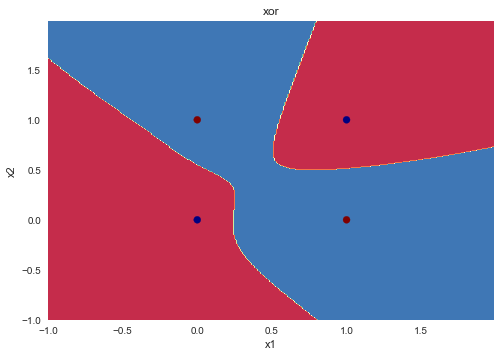

moons
0.944


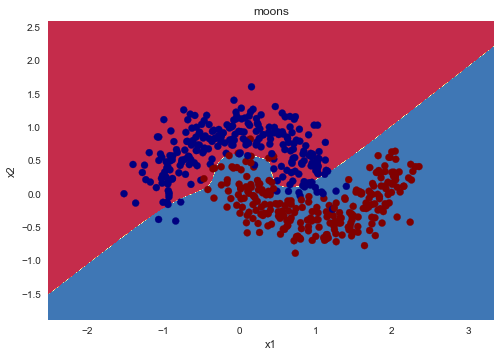

circles
0.974


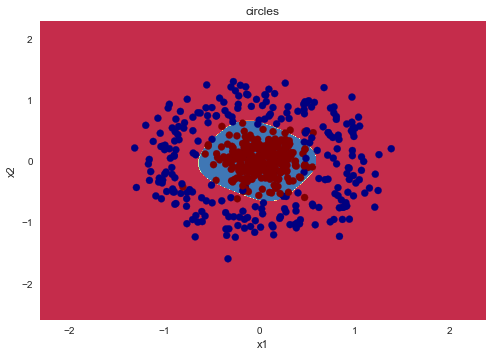

classification
0.938


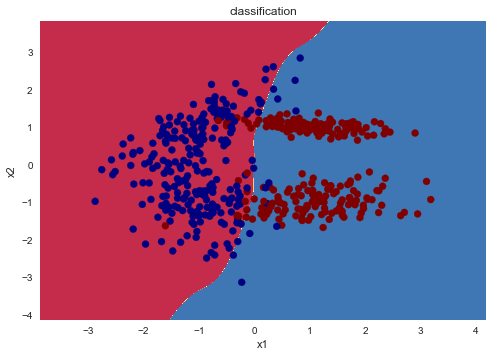

In [463]:
for d in datasets:
    print(d)
    model=neNet(input_size=2,layers=[6,4],out_size=2) #change the neurons to see the effects
    x,y=load_datasets(d)
    train(x,y,model,1100,0.001,logs=False)
    outputs=model.predict(x)
    
    training_accuacy=np.sum(outputs==y)/y.shape[0]
    print(training_accuacy)
    
    plt.title(d)
    plot_decision_boundary(lambda k:model.predict(k),x,y)
    plt.show()

In [11]:
a=np.array([[0,0,1],[0,1,0],[1,0,0]])
p=np.array([[0.2,0.3,.9],[0.1,0.7,0.3],[0.8,0.2,0.3]])

In [12]:
a*p

array([[0. , 0. , 0.9],
       [0. , 0.7, 0. ],
       [0.8, 0. , 0. ]])

In [13]:
np.mean(a*p)

0.26666666666666666

In [15]:
24/9

2.6666666666666665